In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import os

# Visualizing 3D Data

In [2]:
def read_off(file_path):
    with open(file_path, 'r') as file:
        # Read the header
        header = file.readline().strip()
        if header != 'OFF':
            raise ValueError('Not a valid OFF file')

        # Read number of vertices, faces, and edges
        n_verts, n_faces, _ = map(int, file.readline().strip().split())

        # Read vertex coordinates
        vertices = []
        for _ in range(n_verts):
            vertex = list(map(float, file.readline().strip().split()))
            vertices.append(vertex)
        vertices = np.array(vertices)

        # Read faces (index of vertices)
        faces = []
        for _ in range(n_faces):
            face_info = list(map(int, file.readline().strip().split()))
            face = face_info[1:]  # Ignore the first number (number of vertices in the face)
            faces.append(face)
        faces = np.array(faces)

    return vertices, faces

In [26]:
def visualize_model(vertices, faces):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create a Poly3DCollection object
    mesh = Poly3DCollection(vertices[faces], alpha=0.5)
    
    # Add the collection to the axes
    ax.add_collection3d(mesh)

    # Set limits
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Auto scale to the mesh size
    scale = vertices.flatten()
    ax.auto_scale_xyz(scale, scale, scale)

    plt.show()

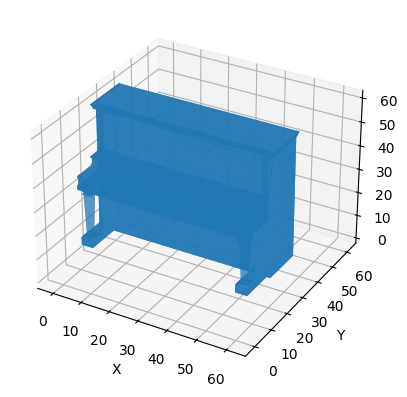

In [43]:
label = "piano"
n = "0205"
model = f"./ModelNet40/{label}/train/{label}_{n}.off"

vertices, faces = read_off(model)
visualize_model(vertices, faces)

# Visualizing 2D sketches

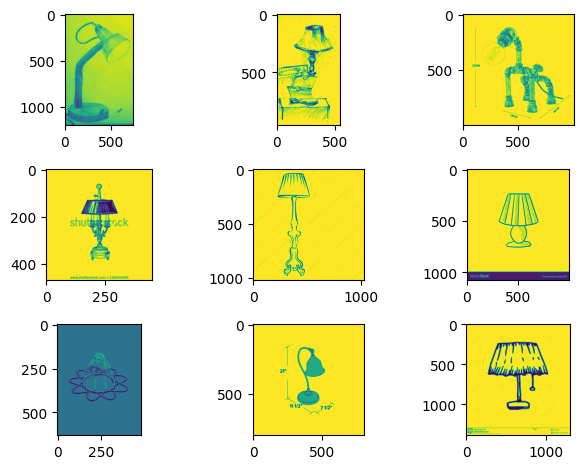

In [48]:
from PIL import Image

label = "lamp"

pth = f"ImageNetSketchMini/{label}/"
fls = os.listdir(pth)

for i in range(9):
    im_pth = pth + fls[i]
    img = Image.open(im_pth)
    img = img.convert('L')
    img = np.array(img)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)

plt.tight_layout()
plt.show()